In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from prophet import Prophet 
import plotly

c:\Users\Tejas\anaconda\envs\SpendWise\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("./datasets/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.drop(columns=['Transaction ID', 'Customer ID', 'Age'],inplace=True)

In [26]:
df.isnull().sum()

Date                0
Gender              0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
df.head()

,Date,Gender,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,Beauty,3,50,150
1,2023-02-27,Female,Clothing,2,500,1000
2,2023-01-13,Male,Electronics,1,30,30
3,2023-05-21,Male,Clothing,1,500,500
4,2023-05-06,Male,Beauty,2,50,100


In [6]:
df['Product Category'].nunique()

3

<Axes: ylabel='Product Category'>

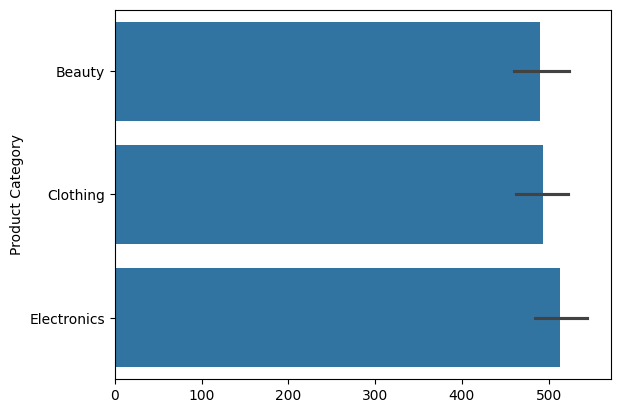

In [7]:
sns.barplot(df['Product Category'])

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
newdf = df[df['Product Category'] == 'Clothing']
newdf2 = df[df['Product Category'] == 'Electronics']
newdf3= df[df['Product Category'] == 'Beauty']


In [20]:
newdf = newdf.sort_values(by="Date", ascending=True)
newdf2 = newdf2.sort_values(by="Date", ascending=True)
newdf3 = newdf3.sort_values(by="Date", ascending=True)

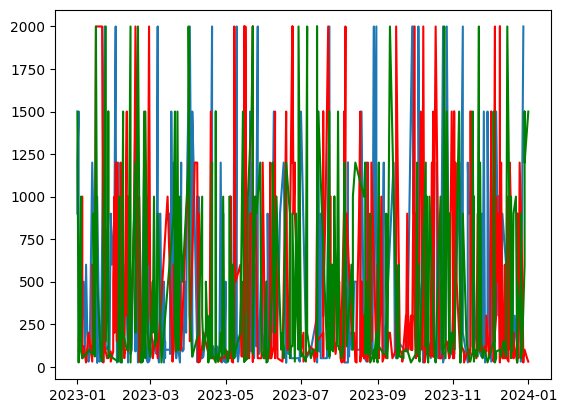

In [22]:
plt.plot(newdf['Date'], newdf['Total Amount'])
plt.plot(newdf2['Date'], newdf2['Total Amount'], color='red')
plt.plot(newdf3['Date'], newdf3['Total Amount'], color='green')

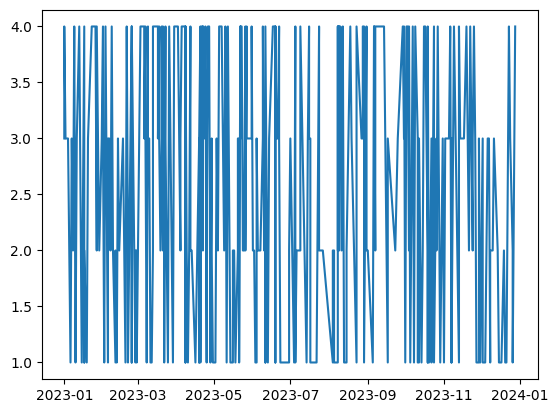

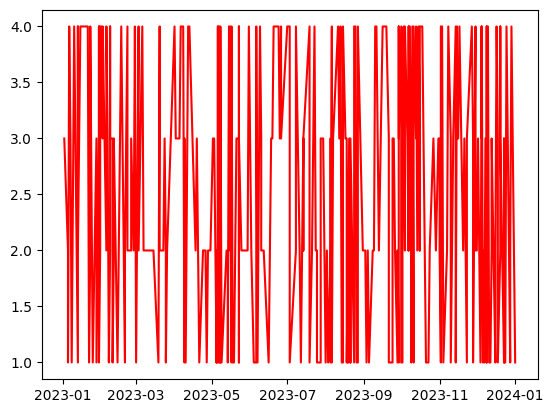

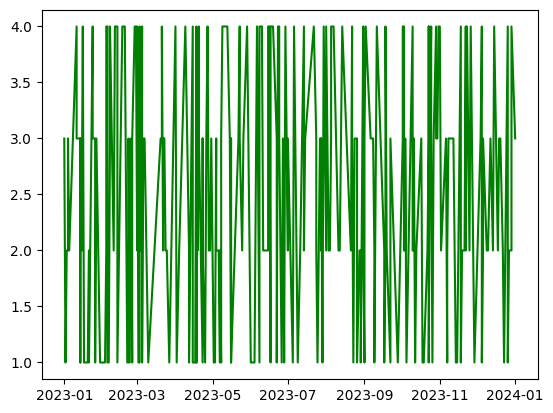

In [25]:
plt.plot(newdf['Date'], newdf['Quantity'])
plt.show()
plt.plot(newdf2['Date'], newdf2['Quantity'], color='red')
plt.show()
plt.plot(newdf3['Date'], newdf3['Quantity'], color='green')
plt.show()

In [28]:
df = pd.read_csv("./datasets/retail_sales_dataset.csv")
df.shape

(1000, 9)

In [34]:
train_size = 0.8
split_index = int(df.shape[0]*train_size)
train = df[:split_index]
test = df[split_index:]


In [36]:
train.shape, test.shape

((800, 9), (200, 9))

In [37]:
train.to_csv("./datasets/train/t1.csv")
test.to_csv("./datasets/test/t1.csv")

In [38]:
from datetime import datetime

In [41]:
datetime.now().year

2025

In [42]:
import requests
country = "IN"
response = requests.get(f"https://holidays.abstractapi.com/v1/?api_key=4840260c617b4c6995c3e83654d795df&country={country}&year=2025&month=8&day=27")

In [49]:
print(response.content)

b'[{"name":"Ganesh Chaturthi/Vinayaka Chaturthi","name_local":"","language":"","description":"","country":"IN","location":"India","type":"Optional","date":"08/27/2025","date_year":"2025","date_month":"08","date_day":"27","week_day":"Wednesday"}]'


In [50]:
data = response.content 
data = data.decode('utf-8')
import json
parsed = json.loads(data)

In [51]:
festival = parsed[0]['name']

In [52]:
festival

'Ganesh Chaturthi/Vinayaka Chaturthi'

In [ ]:

import pandas as pd
dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="D")
type(dates)
dates = dates.date
print(dates[:5])

pandas.core.indexes.datetimes.DatetimeIndex

In [62]:

for i in dates[:5]:
    print(i.month)

1
1
1
1
1


In [74]:
import requests
import json


country = "IN"

festivals = []


for i in dates:
    month = i.month
    day = i.day
    year = i.year

    response = requests.get(f"https://holidays.abstractapi.com/v1/?api_key=4840260c617b4c6995c3e83654d795df&country={country}&year={year}&month={month}&day={day}")
    data = response.content 
    data = data.decode('utf-8')
    parsed = json.loads(data)
    if len(parsed)==0:
        continue
    festival = parsed[0]['name']
    festivals.append(festival)

In [76]:
print(festivals)
import joblib
joblib.dump(festivals, "festivals.joblib")

["New Year's Day", 'Last day of Hanukkah', 'Lohri', 'Pongal', 'Republic Day', 'Lunar New Year', 'Vasant Panchami', 'Guru Ravidas Jayanti', "Valentine's Day", 'Shivaji Jayanti', 'Maharishi Dayanand Saraswati Jayanti', 'Maha Shivaratri/Shivaratri', 'Ramadan Start (Tentative Date)', 'Holika Dahana', 'Holi', 'March Equinox', 'Chaitra Sukhladi', 'Ramzan Id/Eid-ul-Fitar (Tentative Date)', 'Rama Navami', 'Mahavir Jayanti', 'First day of Passover', 'Vaisakhi', 'Maundy Thursday', 'Good Friday', 'Easter Day', "International Worker's Day", 'Birthday of Rabindranath', "Mothers' Day", 'Buddha Purnima/Vesak', 'Bakrid/Eid ul-Adha (Tentative Date)', "Fathers' Day", 'June Solstice', 'Rath Yatra', 'Muharram/Ashura (Tentative Date)', 'Guru Purnima', 'Friendship Day', 'Raksha Bandhan (Rakhi)', 'Independence Day', 'Janmashtami', 'Ganesh Chaturthi/Vinayaka Chaturthi', 'Milad un-Nabi/Id-e-Milad (Tentative Date)', 'First Day of Sharad Navratri', 'First Day of Durga Puja Festivities', 'Maha Saptami', 'Maha Ash

['festivals.joblib']

In [ ]:
month = 1
day = 1
year = 2025
response = requests.get(f"https://holidays.abstractapi.com/v1/?api_key=4840260c617b4c6995c3e83654d795df&country={country}&year={year}&month={month}&day={day}")
data = response.content 

data = data.decode('utf-8')
parsed = json.loads(data)

if len(parsed)==0:
    pass
else:
    festival = parsed[0]['name']
    festivals.append(festival)

In [ ]:
holidays_2025 = {
    "National Holidays": [
        {"name": "Republic Day", "date": "2025-01-26"},
        {"name": "Independence Day", "date": "2025-08-15"},
        {"name": "Gandhi Jayanti", "date": "2025-10-02"}
    ],
    
    "Hindu Festivals": [
        {"name": "Makar Sankranti / Pongal / Magh Bihu", "date": "2025-01-13"},
        {"name": "Holi", "date": "2025-03-14"},
        {"name": "Ram Navami", "date": "2025-04-06"},
        {"name": "Janmashtami", "date": "2025-08-16"},
        {"name": "Ganesh Chaturthi", "date": "2025-08-27"},
        {"name": "Dussehra / Vijayadashami", "date": "2025-10-02"},
        {"name": "Diwali / Deepavali", "date": "2025-10-20"},
        {"name": "Govardhan Puja", "date": "2025-10-22"},
        {"name": "Bhai Dooj", "date": "2025-10-23"}
    ],
    
    "Muslim Festivals": [
        {"name": "Eid al-Fitr (Ramzan Id)", "date": "2025-03-31"},
        {"name": "Eid al-Zuha / Bakrid", "date": "2025-06-07"},
        {"name": "Muharram", "date": "2025-07-06"},
        {"name": "Milad un-Nabi / Id-e-Milad", "date": "2025-09-05"}
    ],
    
    "Christian Festivals": [
        {"name": "Good Friday", "date": "2025-04-18"},
        {"name": "Christmas", "date": "2025-12-25"}
    ],
    
    "Sikh / Jain / Buddhist Festivals": [
        {"name": "Mahavir Jayanti (Jain)", "date": "2025-04-10"},
        {"name": "Buddha Purnima (Buddhist)", "date": "2025-05-12"},  # approx, varies
        {"name": "Guru Nanak Jayanti (Sikh)", "date": "2025-11-05"}
    ],
    
    "Cultural / Regional Festivals": [
        {"name": "Lohri", "date": "2025-01-13"},
        {"name": "Baisakhi / Vishu / Tamil New Year", "date": "2025-04-13"},
        {"name": "Onam", "date": "2025-09-05"}  # starts early Sep
    ],
    
    "Observances": [
        {"name": "Netaji Jayanti / Parakram Diwas", "date": "2025-01-23"},
        {"name": "Labour Day / May Day", "date": "2025-05-01"}
    ]
}


In [77]:
fest = joblib.load("festivals.joblib")
print(fest)

["New Year's Day", 'Last day of Hanukkah', 'Lohri', 'Pongal', 'Republic Day', 'Lunar New Year', 'Vasant Panchami', 'Guru Ravidas Jayanti', "Valentine's Day", 'Shivaji Jayanti', 'Maharishi Dayanand Saraswati Jayanti', 'Maha Shivaratri/Shivaratri', 'Ramadan Start (Tentative Date)', 'Holika Dahana', 'Holi', 'March Equinox', 'Chaitra Sukhladi', 'Ramzan Id/Eid-ul-Fitar (Tentative Date)', 'Rama Navami', 'Mahavir Jayanti', 'First day of Passover', 'Vaisakhi', 'Maundy Thursday', 'Good Friday', 'Easter Day', "International Worker's Day", 'Birthday of Rabindranath', "Mothers' Day", 'Buddha Purnima/Vesak', 'Bakrid/Eid ul-Adha (Tentative Date)', "Fathers' Day", 'June Solstice', 'Rath Yatra', 'Muharram/Ashura (Tentative Date)', 'Guru Purnima', 'Friendship Day', 'Raksha Bandhan (Rakhi)', 'Independence Day', 'Janmashtami', 'Ganesh Chaturthi/Vinayaka Chaturthi', 'Milad un-Nabi/Id-e-Milad (Tentative Date)', 'First Day of Sharad Navratri', 'First Day of Durga Puja Festivities', 'Maha Saptami', 'Maha Ash

In [80]:
holidays_classified = {
    "National / Secular Holidays": [
        "Republic Day",
        "Independence Day",
        "Mahatma Gandhi Jayanti",
        "International Worker's Day",
        "Birthday of Rabindranath",
        "Shivaji Jayanti",
        "Maharishi Dayanand Saraswati Jayanti",
        "Maharishi Valmiki Jayanti",
        "Guru Tegh Bahadur's Martyrdom Day",
        "Guru Govind Singh Jayanti"
    ],

    "Hindu Festivals": [
        "Lohri",
        "Pongal",
        "Vasant Panchami",
        "Maha Shivaratri/Shivaratri",
        "Holika Dahana",
        "Holi",
        "Chaitra Sukhladi",
        "Rama Navami",
        "Mahavir Jayanti",
        "Vaisakhi",
        "Rath Yatra",
        "Guru Purnima",
        "Raksha Bandhan (Rakhi)",
        "Janmashtami",
        "Ganesh Chaturthi/Vinayaka Chaturthi",
        "First Day of Sharad Navratri",
        "First Day of Durga Puja Festivities",
        "Maha Saptami",
        "Maha Ashtami",
        "Maha Navami",
        "Karaka Chaturthi (Karva Chauth)",
        "Naraka Chaturdasi",
        "Govardhan Puja",
        "Bhai Duj",
        "Chhat Puja (Pratihar Sashthi/Surya Sashthi)"
    ],

    "Muslim Festivals": [
        "Ramadan Start (Tentative Date)",
        "Ramzan Id/Eid-ul-Fitar (Tentative Date)",
        "Bakrid/Eid ul-Adha (Tentative Date)",
        "Muharram/Ashura (Tentative Date)",
        "Milad un-Nabi/Id-e-Milad (Tentative Date)"
    ],

    "Christian Festivals": [
        "Maundy Thursday",
        "Good Friday",
        "Easter Day",
        "Christmas Eve",
        "Christmas"
    ],

    "Sikh / Jain / Buddhist Festivals": [
        "Guru Ravidas Jayanti",
        "Buddha Purnima/Vesak",
        "Guru Nanak Jayanti"
    ],

    "Jewish Festivals": [
        "Last day of Hanukkah",
        "First day of Passover",
        "First Day of Hanukkah"
    ],

    "Cultural / Observances": [
        "New Year's Day",
        "Lunar New Year",
        "Valentine's Day",
        "March Equinox",
        "Mothers' Day",
        "Fathers' Day",
        "June Solstice",
        "Friendship Day",
        "Halloween",
        "December Solstice",
        "New Year's Eve"
    ]
}

joblib.dump(holidays_classified, "../src/components/artifacts/events/holidays.joblib")

['../src/components/artifacts/events/holidays.joblib']

In [81]:
festival_products = {
    "National / Secular Holidays": {
        "Republic Day": ["Flags", "Clothing (Tricolor-themed)", "Patriotic Merchandise"],
        "Independence Day": ["Flags", "Kites", "Patriotic Merchandise", "Decorations"],
        "Mahatma Gandhi Jayanti": ["Books", "Khadi Clothing", "Stationery"],
        "International Worker's Day": ["Workwear", "Tools", "Community Event Supplies"],
        "Birthday of Rabindranath": ["Books", "Stationery", "Cultural Event Supplies"],
        "Shivaji Jayanti": ["Traditional Maharashtrian Attire", "Decorations", "Event Supplies"],
        "Maharishi Dayanand Saraswati Jayanti": ["Books", "Cultural Event Items"],
        "Maharishi Valmiki Jayanti": ["Books", "Religious Supplies"],
        "Guru Tegh Bahadur's Martyrdom Day": ["Books", "Cultural Event Supplies"],
        "Guru Govind Singh Jayanti": ["Traditional Sikh Attire", "Religious Supplies"]
    },

    "Hindu Festivals": {
        "Lohri": ["Bonfire Wood", "Peanuts", "Jaggery", "Popcorn", "Traditional Clothes"],
        "Pongal": ["Rice", "Jaggery", "Earthen Pots", "Decorations"],
        "Vasant Panchami": ["Yellow Clothes", "Sweets", "Stationery", "Books"],
        "Maha Shivaratri/Shivaratri": ["Milk", "Flowers", "Bael Leaves", "Incense"],
        "Holika Dahana": ["Wood for Bonfire", "Colors (Gulal)", "Sweets"],
        "Holi": ["Colors (Gulal)", "Water Guns", "Traditional Sweets", "Drinks (Thandai)"],
        "Chaitra Sukhladi": ["New Clothes", "Sweets", "Home Decor"],
        "Rama Navami": ["Religious Books", "Puja Items", "Sweets"],
        "Mahavir Jayanti": ["Religious Books", "Puja Supplies"],
        "Vaisakhi": ["Traditional Punjabi Attire", "Dhols", "Food Items"],
        "Rath Yatra": ["Decorations", "Flowers", "Religious Supplies"],
        "Guru Purnima": ["Books", "Stationery", "Flowers"],
        "Raksha Bandhan (Rakhi)": ["Rakhis", "Sweets", "Gifts", "Clothing"],
        "Janmashtami": ["Butter", "Milk Products", "Flutes", "Decorations"],
        "Ganesh Chaturthi/Vinayaka Chaturthi": ["Ganesh Idols", "Flowers", "Modaks", "Decorations"],
        "First Day of Sharad Navratri": ["New Clothes", "Puja Supplies", "Food Items"],
        "First Day of Durga Puja Festivities": ["Idols", "Decorations", "Clothing"],
        "Maha Saptami": ["Flowers", "Puja Supplies"],
        "Maha Ashtami": ["Flowers", "Puja Supplies", "Food Offerings"],
        "Maha Navami": ["Flowers", "Puja Supplies", "Food Offerings"],
        "Karaka Chaturthi (Karva Chauth)": ["Sarees", "Jewelry", "Cosmetics", "Puja Items"],
        "Naraka Chaturdasi": ["Oil Lamps", "Firecrackers", "Sweets"],
        "Govardhan Puja": ["Food Items", "Decorations", "Flowers"],
        "Bhai Duj": ["Sweets", "Gifts", "Clothing"],
        "Chhat Puja (Pratihar Sashthi/Surya Sashthi)": ["Sugarcane", "Fruits", "Food Items", "Puja Supplies"]
    },

    "Muslim Festivals": {
        "Ramadan Start (Tentative Date)": ["Dates", "Prayer Mats", "Islamic Books"],
        "Ramzan Id/Eid-ul-Fitar (Tentative Date)": ["Clothing", "Sweets (Sheer Khurma)", "Gifts"],
        "Bakrid/Eid ul-Adha (Tentative Date)": ["Goat/Meat", "Cooking Spices", "Clothing"],
        "Muharram/Ashura (Tentative Date)": ["Black Clothing", "Religious Supplies"],
        "Milad un-Nabi/Id-e-Milad (Tentative Date)": ["Books", "Decorations", "Food Items"]
    },

    "Christian Festivals": {
        "Maundy Thursday": ["Candles", "Bread/Wine", "Religious Supplies"],
        "Good Friday": ["Cross Pendants", "Candles", "Religious Books"],
        "Easter Day": ["Easter Eggs", "Cakes", "Clothing", "Decorations"],
        "Christmas Eve": ["Christmas Trees", "Decorations", "Lights", "Gifts"],
        "Christmas": ["Gifts", "Clothing", "Decorations", "Sweets"]
    },

    "Sikh / Jain / Buddhist Festivals": {
        "Guru Ravidas Jayanti": ["Books", "Flowers", "Event Supplies"],
        "Buddha Purnima/Vesak": ["Statues", "Incense", "Flowers", "Candles"],
        "Guru Nanak Jayanti": ["Religious Books", "Clothing", "Food for Langar"]
    },

    "Jewish Festivals": {
        "Last day of Hanukkah": ["Candles (Menorah)", "Food (Latkes, Sufganiyot)", "Gifts"],
        "First day of Passover": ["Matzos", "Wine", "Food Items"],
        "First Day of Hanukkah": ["Candles (Menorah)", "Food", "Decorations"]
    },

    "Cultural / Observances": {
        "New Year's Day": ["Party Supplies", "Alcohol/Drinks", "Decorations"],
        "Lunar New Year": ["Red Envelopes", "Clothing", "Food Items", "Decorations"],
        "Valentine's Day": ["Flowers", "Chocolates", "Jewelry", "Greeting Cards"],
        "March Equinox": ["Seasonal Clothing", "Decor Items"],
        "Mothers' Day": ["Flowers", "Gifts", "Jewelry"],
        "Fathers' Day": ["Clothing", "Gadgets", "Tools"],
        "June Solstice": ["Summer Clothing", "Travel Packages"],
        "Friendship Day": ["Friendship Bands", "Gifts", "Cards"],
        "Halloween": ["Costumes", "Masks", "Candies", "Pumpkins"],
        "December Solstice": ["Winter Clothing", "Heaters", "Travel Packages"],
        "New Year's Eve": ["Party Supplies", "Decorations", "Alcohol/Drinks"]
    }
}

joblib.dump(festival_products, "../src/components/artifacts/events/products.joblib")

['../src/components/artifacts/events/products.joblib']